# Encoding

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,1,298.1,308.6,1551,42.8,0,0,1
1,2,L47181,2,298.2,308.7,1408,46.3,3,0,1
2,3,L47182,2,298.1,308.5,1498,49.4,5,0,1
3,4,L47183,2,298.2,308.6,1433,39.5,7,0,1
4,5,L47184,2,298.2,308.7,1408,40.0,9,0,1
5,6,M14865,1,298.1,308.6,1425,41.9,11,0,1
6,7,L47186,2,298.1,308.6,1558,42.4,14,0,1
7,8,L47187,2,298.1,308.6,1527,40.2,16,0,1
8,9,M14868,1,298.3,308.7,1667,28.6,18,0,1
9,10,M14869,1,298.5,309.0,1741,28.0,21,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [ ]:
df.drop(columns=['Product ID'],inplace=True)
df

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,1,298.1,308.6,1551,42.8,0,0,0
1,2,2,298.2,308.7,1408,46.3,3,0,0
2,3,2,298.1,308.5,1498,49.4,5,0,0
3,4,2,298.2,308.6,1433,39.5,7,0,0
4,5,2,298.2,308.7,1408,40.0,9,0,0
...,...,...,...,...,...,...,...,...,...
9995,9996,1,298.8,308.4,1604,29.5,14,0,0
9996,9997,3,298.9,308.4,1632,31.8,17,0,0
9997,9998,1,299.0,308.6,1645,33.4,22,0,0
9998,9999,3,299.0,308.7,1408,48.5,25,0,0


In [ ]:
X = df.drop(columns="Failure Type" , axis=1)
y = df[["Failure Type"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Testing Accuracy:",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

Training Accuracy    : 96.8 %
Testing Accuracy: 96.25 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       1.00      0.21      0.35        19
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.33      0.20      0.22      2000
weighted avg       0.93      0.96      0.95      2000

--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[1921,    0,    0,    0,    0,    0],
       [  15,    4,    0,    0,    0,    0],
       [   9,    0,    0,    0,    0,    0],
       [  16,    0,    0,    0,    0,    0],
       [   3,    0,    0,    0,    0,    0],
       [  31,    0,    0,    1,    0,    0]])

In [ ]:
#applying decison tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

[Text(0.5152889784946236, 0.9615384615384616, 'x[7] <= 0.5\ngini = 0.066\nsamples = 8000\nvalue = [7731, 76, 36, 62, 15, 80]'),
 Text(0.32963709677419356, 0.8846153846153846, 'x[5] <= 57.45\ngini = 0.004\nsamples = 7738\nvalue = [7723, 0, 0, 0, 15, 0]'),
 Text(0.4224630376344086, 0.9230769230769231, 'True  '),
 Text(0.2399193548387097, 0.8076923076923077, 'x[1] <= 2.5\ngini = 0.003\nsamples = 7522\nvalue = [7510, 0, 0, 0, 12, 0]'),
 Text(0.15188172043010753, 0.7307692307692307, 'x[0] <= 3066.5\ngini = 0.002\nsamples = 6759\nvalue = [6751, 0, 0, 0, 8, 0]'),
 Text(0.06720430107526881, 0.6538461538461539, 'x[0] <= 3065.5\ngini = 0.005\nsamples = 2085\nvalue = [2080, 0, 0, 0, 5, 0]'),
 Text(0.056451612903225805, 0.5769230769230769, 'x[6] <= 131.5\ngini = 0.004\nsamples = 2084\nvalue = [2080, 0, 0, 0, 4, 0]'),
 Text(0.0456989247311828, 0.5, 'gini = 0.0\nsamples = 1278\nvalue = [1278, 0, 0, 0, 0, 0]'),
 Text(0.06720430107526881, 0.5, 'x[6] <= 132.5\ngini = 0.01\nsamples = 806\nvalue = [802, 

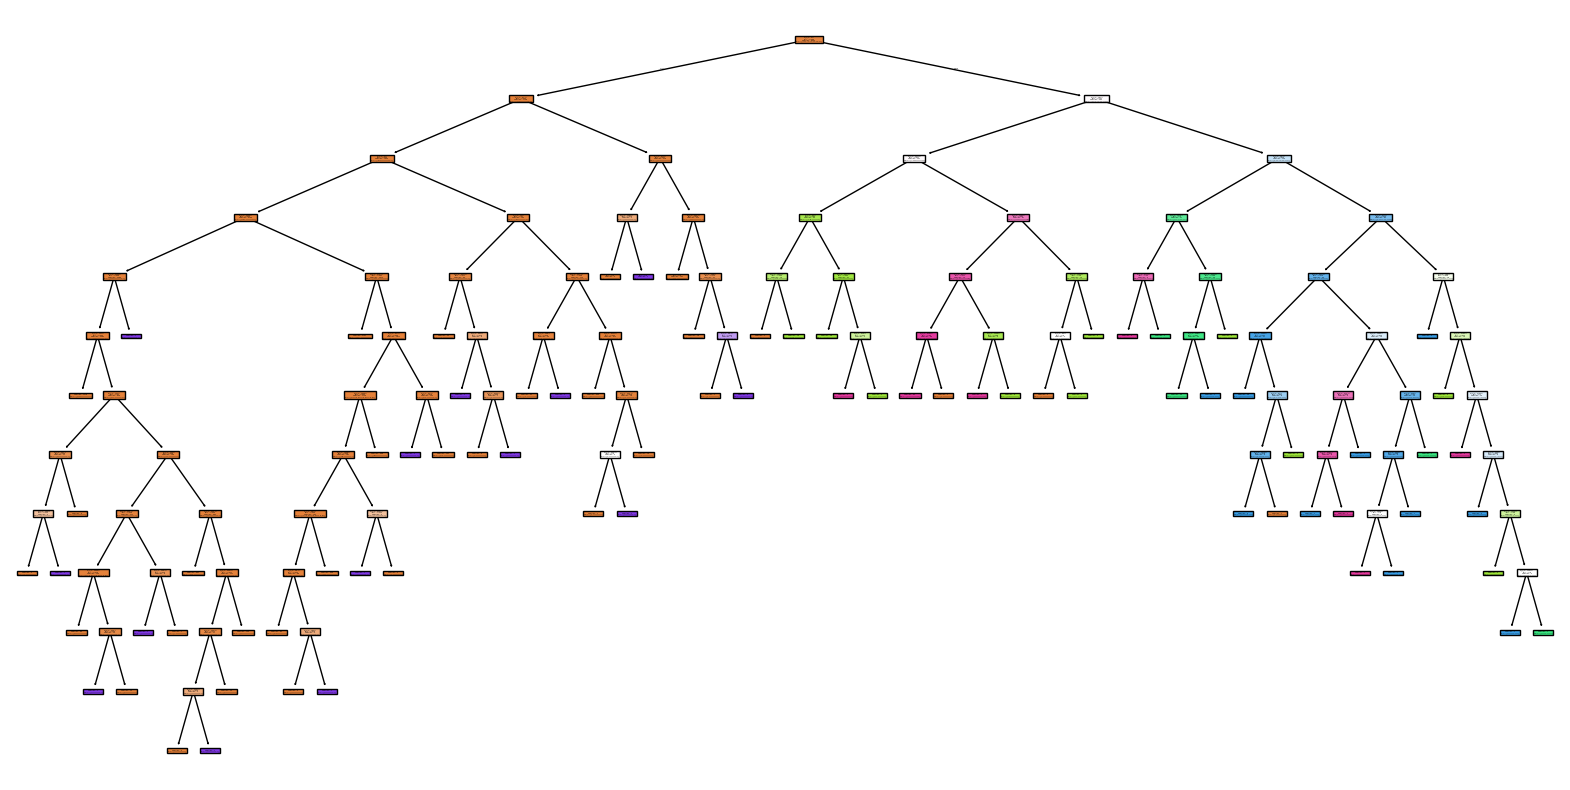

In [ ]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
plot_tree(dt,filled=True)

In [ ]:
#applying classification _report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.83      1.00      0.90        19
           2       1.00      1.00      1.00         9
           3       1.00      0.75      0.86        16
           4       0.00      0.00      0.00         3
           5       1.00      0.97      0.98        32

    accuracy                           0.99      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.99      0.99      0.99      2000



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.995

In [ ]:
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
svc=SVC()
lr=LogisticRegression()

In [ ]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9605

In [ ]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9625

In [ ]:
from sklearn.svm import SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparameters
svc=SVC()
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with default hyperparameters: 0.9605


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with rbf kernel and C=100.0 : 0.9620


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0)
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with rbf kernel and C=1000.0 : 0.9690


In [ ]:
linear_svc=SVC(kernel='linear', C=1.0)
# fit classifier to training set
linear_svc.fit(X_train,y_train)
# make predictions on test set
y_pred_test=linear_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with linear kernel and C=1.0 : 0.9945


In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0)
# fit classifier to training set
linear_svc100.fit(X_train, y_train)
# make predictions on test set
y_pred=linear_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with linear kernel and C=100.0 : 0.9940


In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0)
# fit classifier to training set
linear_svc1000.fit(X_train, y_train)
# make predictions on test set
y_pred=linear_svc1000.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with linear kernel and C=1000.0 : 0.9940


In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0)
# fit classifier to training set
poly_svc.fit(X_train,y_train)
# make predictions on test set
y_pred=poly_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with polynomial kernel and C=1.0 : 0.9605


In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0)
# fit classifier to training set
poly_svc100.fit(X_train, y_train)
# make predictions on test set
y_pred=poly_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with polynomial kernel and C=1.0 : 0.9605


In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)
# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)
# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with sigmoid kernel and C=1.0 : 0.9605


In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)
# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)
# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with sigmoid kernel and C=100.0 : 0.9545


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Stratified cross-validation scores with linear kernel:

[0.992 0.996 0.992 0.995 0.986]


In [ ]:
rbf_svc=SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Stratified Cross-validation scores with rbf kernel:

[0.9635 0.975  0.962  0.965  0.9605]


In [ ]:
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))


Average stratified cross-validation score with rbf kernel:0.9652


# Results and Conclusion

- In this I applied differnt machine learning alogorithms on this dataset
  * while applying logistic regression i got accuracy score is 0.9635  
  *and in case of random forest i got accuracy score is 0.996
  *support vector classifier   accuracy score is 0.9605
  
- Training Accuracy    : 96.79 % and Testing Accuracy: 96.35 % traing and
   testing accuracy is same because of small dataset
   
  *The confusion matrix and classification report yields very good
   model performance.